In [1]:
import pandas as pd 
import numpy as np 
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import calendar 
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS
import warnings
warnings.filterwarnings('ignore')

In [8]:
df_hours = pd.read_csv("../data/Book1.csv")
df_title = pd.read_csv("../data/games_steam.csv")
df_developer = pd.read_csv("../data/games_data.csv", encoding= 'unicode_escape')

# EMPEZAMOS A TRABAJAR CON EL CSV DE HORAS Y PLAYERS,de aqui sacarémos los top 10 videojuegos jugados en referencia a horas y nº de Players


In [9]:
df_hours.head()

,ID,\nName,Peak No. of Players,Hours Played
0,1,Counter-Strike: Global Offensive,"944,895","411,196,700"
1,2,Lost Ark,"580,042","279,812,296"
2,3,Dota 2,"719,422","326,014,122"
3,4,PUBG: BATTLEGROUNDS,"524,023","159,781,183"
4,5,Apex Legends,"370,651","137,813,200"


In [10]:
df_hours.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   ID                    200 non-null    int64 
 1   
Name                 200 non-null    object
 2   Peak No. of Players   200 non-null    object
 3   Hours Played          200 non-null    object
dtypes: int64(1), object(3)
memory usage: 6.4+ KB


In [11]:

nulos_hours = (df_hours.isnull().sum() / df_hours.shape[0] * 100).reset_index()
nulos_hours = nulos_hours[nulos_hours[0] > 0]
nulos_hours.columns = ["columnas", "%_nulos"]
nulos_hours

,columnas,%_nulos


In [12]:
df_hours.shape

(200, 4)

In [13]:
df_hours.head()

,ID,\nName,Peak No. of Players,Hours Played
0,1,Counter-Strike: Global Offensive,"944,895","411,196,700"
1,2,Lost Ark,"580,042","279,812,296"
2,3,Dota 2,"719,422","326,014,122"
3,4,PUBG: BATTLEGROUNDS,"524,023","159,781,183"
4,5,Apex Legends,"370,651","137,813,200"


In [14]:
df_hours.columns

Index(['ID', '\nName', 'Peak No. of Players ', 'Hours Played'], dtype='object')

In [15]:
df_hours['Hours Played']=df_hours['Hours Played'].str.replace(',','').astype('float64')


In [16]:
df_hours['Peak No. of Players '] = df_hours['Peak No. of Players '].str.replace(',','').astype('float64')

In [17]:
df_hours.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID                    200 non-null    int64  
 1   
Name                 200 non-null    object 
 2   Peak No. of Players   200 non-null    float64
 3   Hours Played          200 non-null    float64
dtypes: float64(2), int64(1), object(1)
memory usage: 6.4+ KB


In [18]:
df_hours.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,200.0,1.005000e+02,5.787918e+01,1.0,50.75,100.5,150.25,200.0
Peak No. of Players,200.0,4.044411e+04,1.051887e+05,2964.0,7609.50,14464.0,29625.50,944895.0
Hours Played,200.0,1.612826e+07,4.489661e+07,164366.0,2862349.25,4758623.5,11851169.75,411196700.0


In [19]:
#TOP JUEGOS POR HORAS DE TIEMPO JUGADAS
Max10Played = df_hours.sort_values(by='Hours Played',ascending=False).head(10)
Max10Played

,ID,\nName,Peak No. of Players,Hours Played
0,1,Counter-Strike: Global Offensive,944895.0,411196700.0
2,3,Dota 2,719422.0,326014122.0
1,2,Lost Ark,580042.0,279812296.0
3,4,PUBG: BATTLEGROUNDS,524023.0,159781183.0
4,5,Apex Legends,370651.0,137813200.0
7,8,ELDEN RING,367192.0,130510173.0
5,6,Grand Theft Auto V,138025.0,60165044.0
9,10,Rust,141983.0,57656656.0
11,12,Team Fortress 2,94815.0,53764425.0
16,17,Destiny 2,93881.0,41697664.0


In [20]:
#TOP JUEGOS POR  NÚMERO DE JUGADORES 
Max10Play = df_hours.sort_values(by='Peak No. of Players ',ascending=False).head(10)
Max10Play

,ID,\nName,Peak No. of Players,Hours Played
0,1,Counter-Strike: Global Offensive,944895.0,411196700.0
2,3,Dota 2,719422.0,326014122.0
1,2,Lost Ark,580042.0,279812296.0
3,4,PUBG: BATTLEGROUNDS,524023.0,159781183.0
4,5,Apex Legends,370651.0,137813200.0
7,8,ELDEN RING,367192.0,130510173.0
9,10,Rust,141983.0,57656656.0
6,7,NARAKA: BLADEPOINT,138617.0,39020908.0
5,6,Grand Theft Auto V,138025.0,60165044.0
12,13,Dread Hunger,107437.0,31239372.0


In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [24]:
def generate_cloud_normal(column, filename):

    text = " ".join(cat for cat in df_hours[column])

    word_cloud = WordCloud(
        width=7000,
        height=2000,
        background_color="black",
        colormap="OrRd",
        collocations=True,
        stopwords=STOPWORDS,
        ).generate(text)

    plt.imshow(word_cloud)
    plt.axis("off")

    
    plt.show()

    word_cloud.to_file(f'../data/{filename}.png')

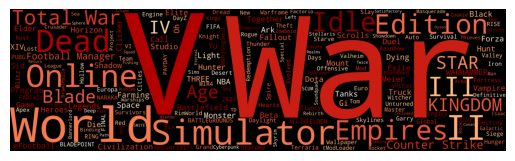

In [25]:
generate_cloud_normal("\nName", "Hours Played" )

In [26]:
top10Players=df_hours.sort_values(by='Peak No. of Players ',ascending=False).head(10)
top10Players

,ID,\nName,Peak No. of Players,Hours Played
0,1,Counter-Strike: Global Offensive,944895.0,411196700.0
2,3,Dota 2,719422.0,326014122.0
1,2,Lost Ark,580042.0,279812296.0
3,4,PUBG: BATTLEGROUNDS,524023.0,159781183.0
4,5,Apex Legends,370651.0,137813200.0
7,8,ELDEN RING,367192.0,130510173.0
9,10,Rust,141983.0,57656656.0
6,7,NARAKA: BLADEPOINT,138617.0,39020908.0
5,6,Grand Theft Auto V,138025.0,60165044.0
12,13,Dread Hunger,107437.0,31239372.0


In [ ]:

df_hours.to_csv('hoursplayed.csv', header=False, index=False)

# AHORA INTENTAREMOS ENRIQUECER LA INFORMACIÓN CON  AÑOS DE LANZAMIENTO Y GENEROS DE LOS MISMOS, POR LO QUE INTENTAREMOS CONSEGUIR FILTROS DE LOS JUEGOS MAS JUGADOS SEGÚN SUS GENEROS Y VALORACIONES.
#Serán los titulos más valorados los más jugados ?
#Serán los juegos más jugados los mejores valorados? 
#INTENTAREMOS RESPONDER  A ESTAS QUESTIONES A PARTIR DE ESTE DATAFRAME . 
#UN 

In [28]:
df_title.head(10)

,ResponseName,ReleaseDate,Metacritic,RecommendationCount,IsFree,GenreIsNonGame,GenreIsIndie,GenreIsAction,GenreIsAdventure,GenreIsCasual,GenreIsStrategy,GenreIsRPG,GenreIsSimulation,GenreIsEarlyAccess,GenreIsFreeToPlay,GenreIsSports,GenreIsRacing,GenreIsMassivelyMultiplayer,PriceInitial
0,Counter-Strike,Nov 1 2000,88,68991,False,False,False,True,False,False,False,False,False,False,False,False,False,False,9.99
1,Team Fortress Classic,Apr 1 1999,0,2439,False,False,False,True,False,False,False,False,False,False,False,False,False,False,4.99
2,Day of Defeat,May 1 2003,79,2319,False,False,False,True,False,False,False,False,False,False,False,False,False,False,4.99
3,Deathmatch Classic,Jun 1 2001,0,888,False,False,False,True,False,False,False,False,False,False,False,False,False,False,4.99
4,Half-Life: Opposing Force,Nov 1 1999,0,2934,False,False,False,True,False,False,False,False,False,False,False,False,False,False,4.99
5,Ricochet,Nov 1 2000,0,1965,False,False,False,True,False,False,False,False,False,False,False,False,False,False,4.99
6,Half-Life,Nov 8 1998,96,12486,False,False,False,True,False,False,False,False,False,False,False,False,False,False,9.99
7,Counter-Strike: Condition Zero,Mar 1 2004,65,7067,False,False,False,True,False,False,False,False,False,False,False,False,False,False,9.99
8,Counter-Strike: Condition Zero,Mar 1 2004,65,7067,False,False,False,True,False,False,False,False,False,False,False,False,False,False,9.99
9,Half-Life: Blue Shift,Jun 1 2001,71,2219,False,False,False,True,False,False,False,False,False,False,False,False,False,False,4.99


In [29]:
df_title.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12624 entries, 0 to 12623
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ResponseName                 12624 non-null  object 
 1   ReleaseDate                  12538 non-null  object 
 2   Metacritic                   12624 non-null  int64  
 3   RecommendationCount          12624 non-null  int64  
 4   IsFree                       12624 non-null  bool   
 5   GenreIsNonGame               12624 non-null  bool   
 6   GenreIsIndie                 12624 non-null  bool   
 7   GenreIsAction                12624 non-null  bool   
 8   GenreIsAdventure             12624 non-null  bool   
 9   GenreIsCasual                12624 non-null  bool   
 10  GenreIsStrategy              12624 non-null  bool   
 11  GenreIsRPG                   12624 non-null  bool   
 12  GenreIsSimulation            12624 non-null  bool   
 13  GenreIsEarlyAcce

In [30]:
df_title.shape

(12624, 19)

In [31]:
df_title.describe()

,Metacritic,RecommendationCount,PriceInitial
count,12624.000000,1.262400e+04,12624.000000
mean,12.955640,1.245043e+03,9.290024
std,28.094054,1.560722e+04,14.164946
min,0.000000,0.000000e+00,0.000000
25%,0.000000,0.000000e+00,1.990000
50%,0.000000,0.000000e+00,5.990000
75%,0.000000,2.692500e+02,9.990000
max,96.000000,1.427633e+06,449.990000


In [32]:
df_title.isnull().sum()

ResponseName                    0
ReleaseDate                    86
Metacritic                      0
RecommendationCount             0
IsFree                          0
GenreIsNonGame                  0
GenreIsIndie                    0
GenreIsAction                   0
GenreIsAdventure                0
GenreIsCasual                   0
GenreIsStrategy                 0
GenreIsRPG                      0
GenreIsSimulation               0
GenreIsEarlyAccess              0
GenreIsFreeToPlay               0
GenreIsSports                   0
GenreIsRacing                   0
GenreIsMassivelyMultiplayer     0
PriceInitial                    0
dtype: int64

In [33]:
#Calculamos el porcentaje de nulos que tiene nuestro dataset y en qué columna


nulos = (df_title.isnull().sum() / df_title.shape[0] * 100).reset_index()
nulos = nulos[nulos[0] > 0]
nulos.columns = ["columnas", "%_nulos"]
nulos

,columnas,%_nulos
1,ReleaseDate,0.681242


In [34]:
df_title.head()

,ResponseName,ReleaseDate,Metacritic,RecommendationCount,IsFree,GenreIsNonGame,GenreIsIndie,GenreIsAction,GenreIsAdventure,GenreIsCasual,GenreIsStrategy,GenreIsRPG,GenreIsSimulation,GenreIsEarlyAccess,GenreIsFreeToPlay,GenreIsSports,GenreIsRacing,GenreIsMassivelyMultiplayer,PriceInitial
0,Counter-Strike,Nov 1 2000,88,68991,False,False,False,True,False,False,False,False,False,False,False,False,False,False,9.99
1,Team Fortress Classic,Apr 1 1999,0,2439,False,False,False,True,False,False,False,False,False,False,False,False,False,False,4.99
2,Day of Defeat,May 1 2003,79,2319,False,False,False,True,False,False,False,False,False,False,False,False,False,False,4.99
3,Deathmatch Classic,Jun 1 2001,0,888,False,False,False,True,False,False,False,False,False,False,False,False,False,False,4.99
4,Half-Life: Opposing Force,Nov 1 1999,0,2934,False,False,False,True,False,False,False,False,False,False,False,False,False,False,4.99


In [35]:
df_title.drop(['GenreIsNonGame',"GenreIsIndie","GenreIsAction","GenreIsAdventure","GenreIsCasual",
               "GenreIsStrategy","GenreIsRPG","GenreIsSimulation","GenreIsEarlyAccess","GenreIsFreeToPlay",
               "GenreIsSports","GenreIsRacing","GenreIsMassivelyMultiplayer"], axis=1,inplace = True)


In [36]:
df_title.columns

Index(['ResponseName', 'ReleaseDate', 'Metacritic', 'RecommendationCount',
       'IsFree', 'PriceInitial'],
      dtype='object')

In [37]:
TopRated = df_title.sort_values(by='Metacritic',ascending=False).head(10)
TopRated

,ResponseName,ReleaseDate,Metacritic,RecommendationCount,IsFree,PriceInitial
3088,Grand Theft Auto V,Apr 13 2015,96,136846,False,59.99
6,Half-Life,Nov 8 1998,96,12486,False,9.99
232,BioShock(tm),Aug 21 2007,96,16260,False,19.99
10,Half-Life 2,Nov 16 2004,96,35792,False,9.99
928,Portal 2,Apr 18 2011,95,73144,False,19.99
26,Portal 2,Apr 18 2011,95,73128,False,19.99
24,Portal 2,Apr 18 2011,95,73128,False,19.99
631,Mass Effect 2,Jan 26 2010,94,7263,False,19.99
273,BioShock Infinite,Mar 25 2013,94,55512,False,29.99
1365,The Elder Scrolls V: Skyrim,Nov 10 2011,94,182587,False,19.99


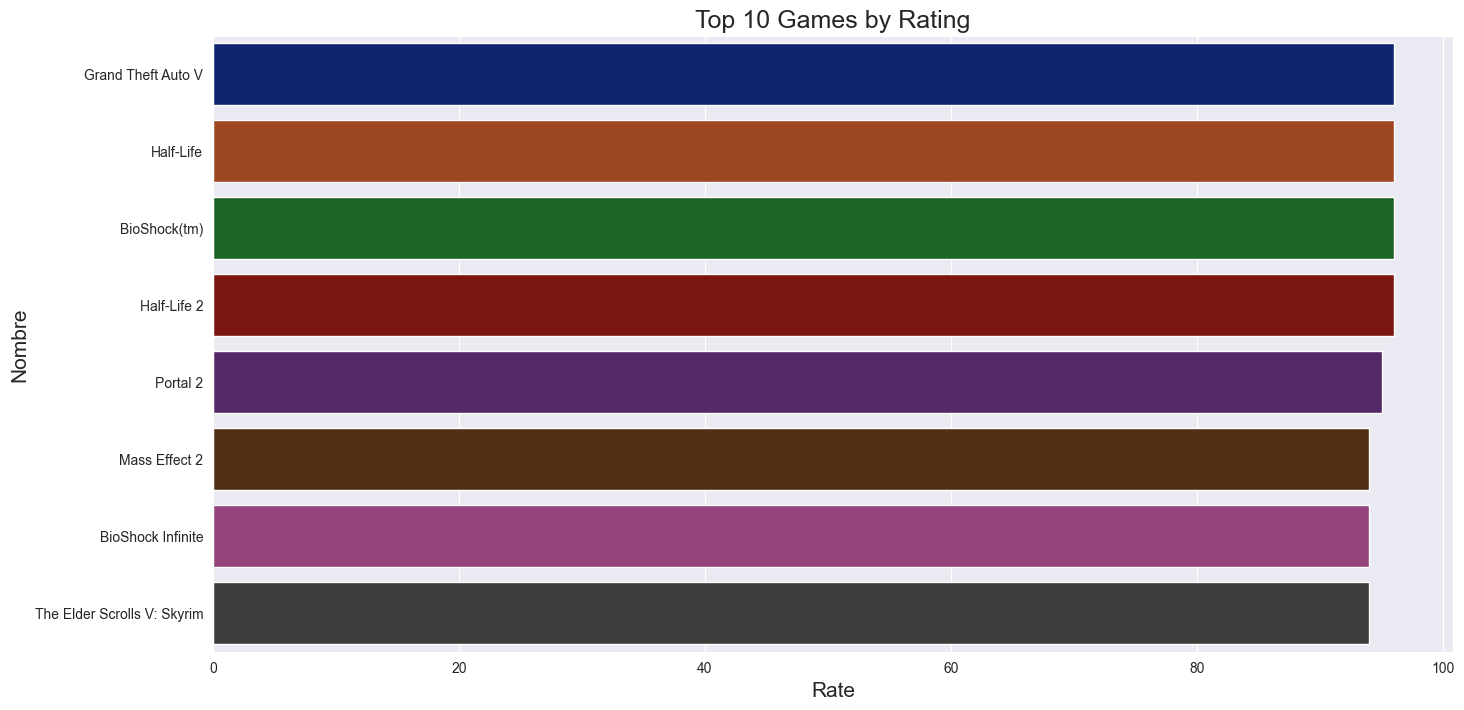

In [38]:
sns.set_style("darkgrid")
plt.figure(figsize=(16,8))
sns.barplot(x='Metacritic',y='ResponseName',data=TopRated,palette='dark')
plt.ylabel('Nombre',fontsize=15)
plt.xlabel('Rate',fontsize=15)
plt.title('Top 10 Games by Rating',fontsize=18)
plt.savefig('save_as_png.png')

In [39]:
plt.savefig('save_as_a_png.png')

<Figure size 640x480 with 0 Axes>

In [ ]:
df_title.to_csv('titulos.csv', header=False, index=False)

In [40]:
df_developer.describe().T

,count,mean,std,min,25%,50%,75%,max
mac_support,73340.0,0.214644,0.410578,0.0,0.0,0.0,0.0,1.0
lin_support,73339.0,0.149498,0.356581,0.0,0.0,0.0,0.0,1.0


In [41]:
df_developer.head(10)

,id,title,release_date,developer,publisher,genres,multiplayer_or_singleplayer,price,dc_price,overall_review,detailed_review,reviews,percent_positive,win_support,mac_support,lin_support
0,0,Counter-Strike: Global Offensive,2012-08-21,Valve;Hidden Path Entertainment,Valve,Action;Free to Play,Multi-player;Steam Achievements;Full controlle...,Free to play,Free to play,Positive,Very Positive,6774812,88%,1,1.0,1.0
1,1,Dota 2,2013-07-09,Valve,Valve,Action;Free to Play;Strategy,Multi-player;Co-op;Steam Trading Cards;Steam W...,Free to play,Free to play,Positive,Very Positive,1885261,82%,1,1.0,1.0
2,2,"Warhammer 40,000: Darktide",NaN,NaN,NaN,NaN,NaN,"2,199","2,199",Positive,Mostly Positive,26092,72%,1,0.0,0.0
3,3,Call of Duty®: Modern Warfare® II,NaN,NaN,NaN,NaN,NaN,"4,999","4,999",Mixed,Mixed,215969,64%,1,0.0,0.0
4,4,Apex Legends,NaN,NaN,NaN,NaN,NaN,Free to play,Free to play,Positive,Very Positive,539297,85%,1,0.0,0.0
5,5,PUBG: BATTLEGROUNDS,NaN,NaN,NaN,NaN,NaN,Free to play,Free to play,Mixed,Mixed,2109992,56%,1,0.0,0.0
6,6,NARAKA: BLADEPOINT,NaN,NaN,NaN,NaN,NaN,"1,199","1,199",Positive,Mostly Positive,130245,73%,1,0.0,0.0
7,7,Dead by Daylight,2016-06-14,Behaviour Digital Inc.,Behaviour Digital Inc.,Action,Multi-player;Online Multi-Player;Co-op;Online ...,749,749,Positive,Very Positive,453698,81%,1,0.0,0.0
8,8,Warframe,2013-03-25,Digital Extremes,Digital Extremes,Action;Free to Play,Single-player;Multi-player;Co-op;Steam Trading...,Free to play,Free to play,Positive,Very Positive,512887,87%,1,0.0,0.0
9,9,War Thunder,2013-08-15,Gaijin Entertainment,Gaijin Entertainment,Action;Free to Play;Massively Multiplayer;Simu...,Single-player;MMO;Co-op;Cross-Platform Multipl...,Free to play,Free to play,Positive,Mixed,28437,48%,1,1.0,1.0


In [42]:
unique_developer = df_developer["developer"].unique().tolist()
unique_developer

['Valve;Hidden Path Entertainment',
 'Valve',
 nan,
 'Behaviour Digital Inc.',
 'Digital Extremes',
 'Gaijin Entertainment',
 'Rockstar North',
 'Zenimax Online Studios',
 'Ludeon Studios',
 'Facepunch Studios',
 'SCS Software',
 'Ubisoft Montreal',
 'Square Enix',
 'Colossal Order Ltd.',
 'The Indie Stone',
 'Wargaming Group Limited',
 'Redbeet Interactive',
 'Hello Games',
 'Endnight Games Ltd',
 'Firaxis Games;Aspyr (Mac);Aspyr (Linux)',
 'NeocoreGames',
 'Paradox Development Studio',
 'Bethesda Game Studios',
 'Studio Wildcard;Instinct Games;Efecto Studios;Virtual Basement LLC',
 'Expansive Worlds',
 'Gamepires;Croteam',
 'ConcernedApe',
 'Re-Logic',
 'Ghost Ship Games',
 'Klei Entertainment',
 'Treyarch;Aspyr (Mac)',
 'BeamNG',
 'Titan Forge Games',
 'Bohemia Interactive',
 'Fatshark',
 'Egosoft',
 'Kunos Simulazioni',
 'Ninja Kiwi',
 'Hopoo Games',
 'Nicalis, Inc.',
 'OVERKILL - a Starbreeze Studio.',
 'CREATIVE ASSEMBLY;Feral Interactive (Mac);Feral Interactive (Linux)',
 'CD PR

In [43]:
df_developer["genres"].isnull().sum()

50064

In [44]:
df_developer["price"].unique

<bound method Series.unique of 0        Free to play
1        Free to play
2               2,199
3               4,999
4        Free to play
             ...     
73340    Free to play
73341             219
73342    Free to play
73343    Free to play
73344    Free to play
Name: price, Length: 73345, dtype: object>

In [45]:
df_developer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73345 entries, 0 to 73344
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           73341 non-null  object 
 1   title                        73341 non-null  object 
 2   release_date                 23281 non-null  object 
 3   developer                    23281 non-null  object 
 4   publisher                    23281 non-null  object 
 5   genres                       23281 non-null  object 
 6   multiplayer_or_singleplayer  23281 non-null  object 
 7   price                        73340 non-null  object 
 8   dc_price                     73340 non-null  object 
 9   overall_review               36875 non-null  object 
 10  detailed_review              36865 non-null  object 
 11  reviews                      36865 non-null  object 
 12  percent_positive             36865 non-null  object 
 13  win_support     

Text(0.5, 1.0, 'Top 10 Games by Rating')

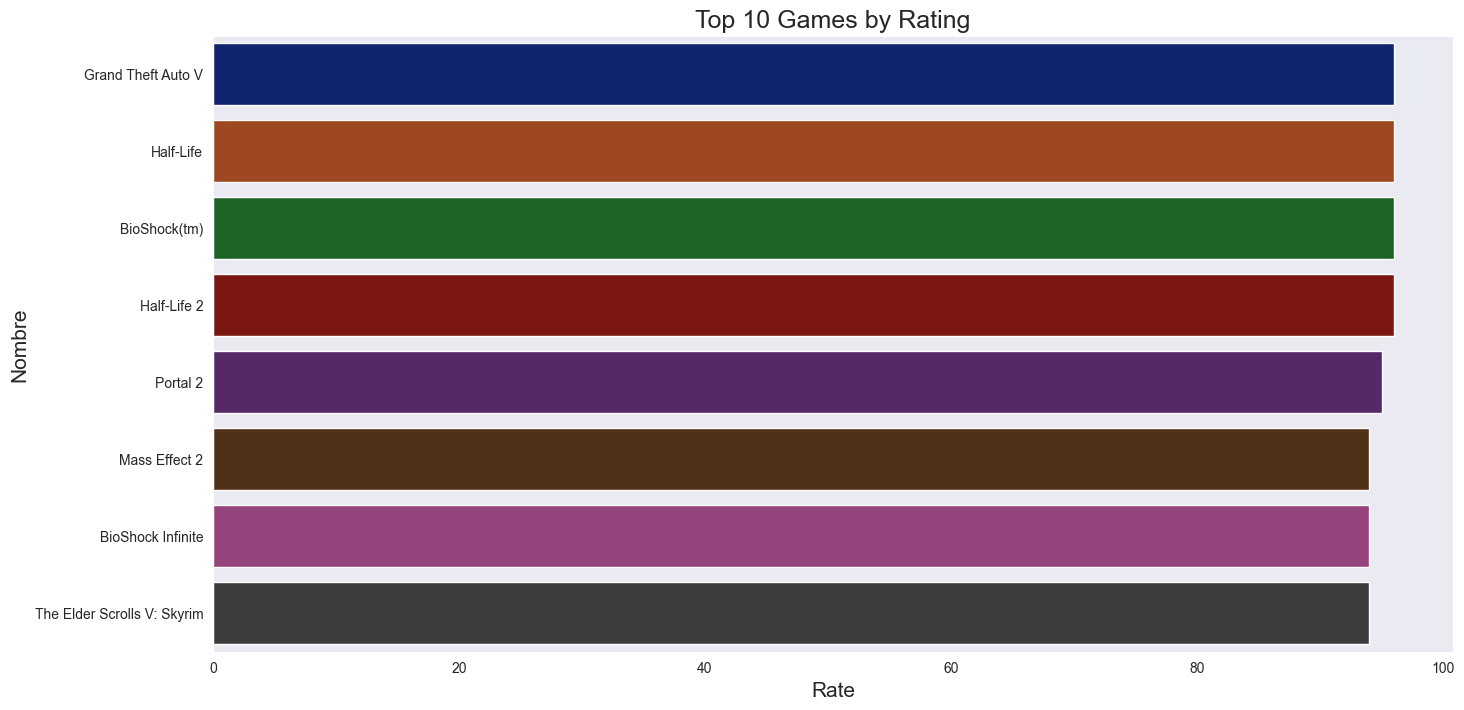

In [46]:
sns.set_style("dark")
plt.figure(figsize=(16,8))
sns.barplot(x='Metacritic',y='ResponseName',data=TopRated,palette='dark')
plt.ylabel('Nombre',fontsize=15)
plt.xlabel('Rate',fontsize=15)
plt.title('Top 10 Games by Rating',fontsize=18)

In [47]:
df_developer.head(2)

,id,title,release_date,developer,publisher,genres,multiplayer_or_singleplayer,price,dc_price,overall_review,detailed_review,reviews,percent_positive,win_support,mac_support,lin_support
0,0,Counter-Strike: Global Offensive,2012-08-21,Valve;Hidden Path Entertainment,Valve,Action;Free to Play,Multi-player;Steam Achievements;Full controlle...,Free to play,Free to play,Positive,Very Positive,6774812,88%,1,1.0,1.0
1,1,Dota 2,2013-07-09,Valve,Valve,Action;Free to Play;Strategy,Multi-player;Co-op;Steam Trading Cards;Steam W...,Free to play,Free to play,Positive,Very Positive,1885261,82%,1,1.0,1.0


In [48]:
df_developer.columns

Index(['id', 'title', 'release_date', 'developer', 'publisher', 'genres',
       'multiplayer_or_singleplayer', 'price', 'dc_price', 'overall_review',
       'detailed_review', 'reviews', 'percent_positive', 'win_support',
       'mac_support', 'lin_support'],
      dtype='object')

In [49]:
df_developer.drop(["genres","detailed_review","overall_review","reviews","percent_positive",
                 "win_support","mac_support","lin_support"],axis=1,inplace=True)

In [50]:
df_developer.head()

,id,title,release_date,developer,publisher,multiplayer_or_singleplayer,price,dc_price
0,0,Counter-Strike: Global Offensive,2012-08-21,Valve;Hidden Path Entertainment,Valve,Multi-player;Steam Achievements;Full controlle...,Free to play,Free to play
1,1,Dota 2,2013-07-09,Valve,Valve,Multi-player;Co-op;Steam Trading Cards;Steam W...,Free to play,Free to play
2,2,"Warhammer 40,000: Darktide",NaN,NaN,NaN,NaN,"2,199","2,199"
3,3,Call of Duty®: Modern Warfare® II,NaN,NaN,NaN,NaN,"4,999","4,999"
4,4,Apex Legends,NaN,NaN,NaN,NaN,Free to play,Free to play


In [51]:
df_developer["release_date"].isnull().sum()

50064

In [52]:
df_developer.shape

(73345, 8)

# DROPEAREMOS LAS COLUMNAS QUE NOS SOBREN QUE SERÁN LAS RELACIONADAS CON RATING Y GENERO, DADO QUE ESTA INFORMACIÓN LA SACAREMOS DEL SCRAPPING

In [53]:
df_hours.head()

,ID,\nName,Peak No. of Players,Hours Played
0,1,Counter-Strike: Global Offensive,944895.0,411196700.0
1,2,Lost Ark,580042.0,279812296.0
2,3,Dota 2,719422.0,326014122.0
3,4,PUBG: BATTLEGROUNDS,524023.0,159781183.0
4,5,Apex Legends,370651.0,137813200.0


In [ ]:
df_hours.to_csv('hours.csv', header=False, index=False) 

In [54]:
df_developer.head()

,id,title,release_date,developer,publisher,multiplayer_or_singleplayer,price,dc_price
0,0,Counter-Strike: Global Offensive,2012-08-21,Valve;Hidden Path Entertainment,Valve,Multi-player;Steam Achievements;Full controlle...,Free to play,Free to play
1,1,Dota 2,2013-07-09,Valve,Valve,Multi-player;Co-op;Steam Trading Cards;Steam W...,Free to play,Free to play
2,2,"Warhammer 40,000: Darktide",NaN,NaN,NaN,NaN,"2,199","2,199"
3,3,Call of Duty®: Modern Warfare® II,NaN,NaN,NaN,NaN,"4,999","4,999"
4,4,Apex Legends,NaN,NaN,NaN,NaN,Free to play,Free to play


In [55]:
df_developer.drop(["release_date"],axis = 1,inplace = True)

In [56]:
df_title.head()

,ResponseName,ReleaseDate,Metacritic,RecommendationCount,IsFree,PriceInitial
0,Counter-Strike,Nov 1 2000,88,68991,False,9.99
1,Team Fortress Classic,Apr 1 1999,0,2439,False,4.99
2,Day of Defeat,May 1 2003,79,2319,False,4.99
3,Deathmatch Classic,Jun 1 2001,0,888,False,4.99
4,Half-Life: Opposing Force,Nov 1 1999,0,2934,False,4.99


In [57]:
df_title.drop(["IsFree"],axis = 1,inplace = True)


In [58]:
df_developer.drop(["id"],axis = 1,inplace = True)

In [59]:
df_developer.head()

,title,developer,publisher,multiplayer_or_singleplayer,price,dc_price
0,Counter-Strike: Global Offensive,Valve;Hidden Path Entertainment,Valve,Multi-player;Steam Achievements;Full controlle...,Free to play,Free to play
1,Dota 2,Valve,Valve,Multi-player;Co-op;Steam Trading Cards;Steam W...,Free to play,Free to play
2,"Warhammer 40,000: Darktide",NaN,NaN,NaN,"2,199","2,199"
3,Call of Duty®: Modern Warfare® II,NaN,NaN,NaN,"4,999","4,999"
4,Apex Legends,NaN,NaN,NaN,Free to play,Free to play


In [60]:
df_hours.head()

,ID,\nName,Peak No. of Players,Hours Played
0,1,Counter-Strike: Global Offensive,944895.0,411196700.0
1,2,Lost Ark,580042.0,279812296.0
2,3,Dota 2,719422.0,326014122.0
3,4,PUBG: BATTLEGROUNDS,524023.0,159781183.0
4,5,Apex Legends,370651.0,137813200.0


In [61]:
df_hours.rename(columns = {'\nName':'title',"Peak No. of Players":"Max.Players"}, inplace = True)

In [62]:
df_hours.rename(columns = {"Peak No. of Players":"Max.Players"}, inplace = True)

In [63]:
df_hours.head()

,ID,title,Peak No. of Players,Hours Played
0,1,Counter-Strike: Global Offensive,944895.0,411196700.0
1,2,Lost Ark,580042.0,279812296.0
2,3,Dota 2,719422.0,326014122.0
3,4,PUBG: BATTLEGROUNDS,524023.0,159781183.0
4,5,Apex Legends,370651.0,137813200.0


In [64]:
df_title.head()

,ResponseName,ReleaseDate,Metacritic,RecommendationCount,PriceInitial
0,Counter-Strike,Nov 1 2000,88,68991,9.99
1,Team Fortress Classic,Apr 1 1999,0,2439,4.99
2,Day of Defeat,May 1 2003,79,2319,4.99
3,Deathmatch Classic,Jun 1 2001,0,888,4.99
4,Half-Life: Opposing Force,Nov 1 1999,0,2934,4.99


In [65]:
df_title.shape

(12624, 5)

In [66]:
df_title["ReleaseDate"].isnull().sum()

86

In [67]:
df_title["PriceInitial"].isnull().sum()

0

In [68]:
df_title.drop(["Metacritic"],axis = 1,inplace = True)

In [69]:
df_title.shape

(12624, 4)

In [70]:
df_title

,ResponseName,ReleaseDate,RecommendationCount,PriceInitial
0,Counter-Strike,Nov 1 2000,68991,9.99
1,Team Fortress Classic,Apr 1 1999,2439,4.99
2,Day of Defeat,May 1 2003,2319,4.99
3,Deathmatch Classic,Jun 1 2001,888,4.99
4,Half-Life: Opposing Force,Nov 1 1999,2934,4.99
...,...,...,...,...
12619,ObserVR Beta,Oct 26 2016,0,0.00
12620,One Night Stand,NaN,0,0.00
12621,Fiber Twig: Midnight Puzzle,Oct 26 2016,0,2.99
12622,Charm Tale Quest,Oct 27 2016,0,2.99


In [ ]:
df_developer.to_csv('data/developer.csv', header=True, index=False)

In [71]:
df_title

,ResponseName,ReleaseDate,RecommendationCount,PriceInitial
0,Counter-Strike,Nov 1 2000,68991,9.99
1,Team Fortress Classic,Apr 1 1999,2439,4.99
2,Day of Defeat,May 1 2003,2319,4.99
3,Deathmatch Classic,Jun 1 2001,888,4.99
4,Half-Life: Opposing Force,Nov 1 1999,2934,4.99
...,...,...,...,...
12619,ObserVR Beta,Oct 26 2016,0,0.00
12620,One Night Stand,NaN,0,0.00
12621,Fiber Twig: Midnight Puzzle,Oct 26 2016,0,2.99
12622,Charm Tale Quest,Oct 27 2016,0,2.99


In [72]:
df_hours.shape

(200, 4)

In [73]:
df_developer.shape

(73345, 6)

In [81]:
df_imdb = pd.read_csv("../data/imbdb.csv")

In [82]:
df_imdb.head()

,title,rating,genre
0,Kingdom Hearts HD 2.5 Remix,9.3,"Action, Adventure, Family"
1,The Legend of Zelda: Ocarina of Time 3D,9.3,"Action, Adventure, Family"
2,Dofus,9.3,Adventure
3,Kingdom Hearts HD 1.5 + 2.5 Remix,9.3,"Action, Adventure, Family"
4,Bad Ben,9.3,"Comedy, Horror"


In [83]:
df_final = pd.concat([df_developer, df_title,df_imdb])
df_final

,title,developer,publisher,multiplayer_or_singleplayer,price,dc_price,ResponseName,ReleaseDate,RecommendationCount,PriceInitial,rating,genre
0,Counter-Strike: Global Offensive,Valve;Hidden Path Entertainment,Valve,Multi-player;Steam Achievements;Full controlle...,Free to play,Free to play,NaN,NaN,NaN,NaN,NaN,NaN
1,Dota 2,Valve,Valve,Multi-player;Co-op;Steam Trading Cards;Steam W...,Free to play,Free to play,NaN,NaN,NaN,NaN,NaN,NaN
2,"Warhammer 40,000: Darktide",NaN,NaN,NaN,"2,199","2,199",NaN,NaN,NaN,NaN,NaN,NaN
3,Call of Duty®: Modern Warfare® II,NaN,NaN,NaN,"4,999","4,999",NaN,NaN,NaN,NaN,NaN,NaN
4,Apex Legends,NaN,NaN,NaN,Free to play,Free to play,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
10045,God of War,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.1,"Action, Adventure, Drama"
10046,God of War III,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.1,"Action, Adventure, Drama"
10047,Mass Effect,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.1,"Action, Adventure, Horror"
10048,Mass Effect 3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.1,Action


In [85]:
df_final.drop(["ResponseName","ResponseName","RecommendationCount"],axis = 1,inplace = True)

In [86]:
df_final

,title,developer,publisher,multiplayer_or_singleplayer,price,dc_price,ReleaseDate,PriceInitial,rating,genre
0,Counter-Strike: Global Offensive,Valve;Hidden Path Entertainment,Valve,Multi-player;Steam Achievements;Full controlle...,Free to play,Free to play,NaN,NaN,NaN,NaN
1,Dota 2,Valve,Valve,Multi-player;Co-op;Steam Trading Cards;Steam W...,Free to play,Free to play,NaN,NaN,NaN,NaN
2,"Warhammer 40,000: Darktide",NaN,NaN,NaN,"2,199","2,199",NaN,NaN,NaN,NaN
3,Call of Duty®: Modern Warfare® II,NaN,NaN,NaN,"4,999","4,999",NaN,NaN,NaN,NaN
4,Apex Legends,NaN,NaN,NaN,Free to play,Free to play,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
10045,God of War,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.1,"Action, Adventure, Drama"
10046,God of War III,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.1,"Action, Adventure, Drama"
10047,Mass Effect,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.1,"Action, Adventure, Horror"
10048,Mass Effect 3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.1,Action


In [88]:
df_final.to_csv('FINAL.csv', header=True, index=False)